In [1]:
# project: p6
# submitter: cmbatchelor
# partner: none
# hours: 8

In [2]:
import pandas as pd
from shapely.geometry import Polygon, box, Point
import geopandas as gpd
import sqlite3
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.mask import mask
from matplotlib.colors import ListedColormap

In [3]:
df = gpd.read_file('counties.geojson')

In [4]:
#q1
len(df)

72

<AxesSubplot:>

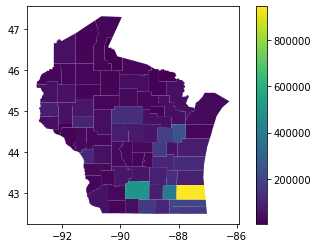

In [5]:
#q2
df.plot(column = "POP100", legend = True)

In [6]:
conn = sqlite3.connect("counties_tracts.db")
counties = pd.read_sql("""SELECT * FROM counties""", conn)
tracts = pd.read_sql("""SELECT * FROM tracts""", conn)

In [7]:
df['AREALAND'] = counties['AREALAND']

In [8]:
train, test = train_test_split(df, random_state=320, test_size=0.25)

In [9]:
#q3
list(test['NAME'])

['Kewaunee County',
 'Calumet County',
 'Adams County',
 'Eau Claire County',
 'Milwaukee County',
 'Ashland County',
 'Wood County',
 'Dodge County',
 'Sauk County',
 'Clark County',
 'Pepin County',
 'Taylor County',
 'Iron County',
 'Outagamie County',
 'Florence County',
 'Oneida County',
 'Pierce County',
 'Grant County']

In [10]:
#q4
model = LinearRegression()
model.fit(train[["AREALAND"]], train["POP100"])
model.score(test[["AREALAND"]], test["POP100"])

0.022002661530554857

In [11]:
#q5
sqmet = 500 * 1000000 * 2.59
model.coef_[0] * sqmet + model.intercept_

82032.53073541154

In [12]:
HU = pd.read_sql("""
  SELECT tracts.county, counties.name, SUM(HU100) as total_hu 
  FROM tracts INNER JOIN counties 
  ON tracts.county = counties.county
  GROUP BY tracts.county""",
  conn)
HU = HU.set_index("NAME")

In [13]:
df = df.set_index('NAME')
df["HU100"] = HU["total_hu"]

In [14]:
train, test = train_test_split(df, random_state=320, test_size=0.25)

In [15]:
#q6
list(test.index)

['Kewaunee County',
 'Calumet County',
 'Adams County',
 'Eau Claire County',
 'Milwaukee County',
 'Ashland County',
 'Wood County',
 'Dodge County',
 'Sauk County',
 'Clark County',
 'Pepin County',
 'Taylor County',
 'Iron County',
 'Outagamie County',
 'Florence County',
 'Oneida County',
 'Pierce County',
 'Grant County']

In [16]:
#q7
dict(train["HU100"])

{'Walworth County': 51531,
 'Marquette County': 9896,
 'Racine County': 82164,
 'Waupaca County': 25396,
 'Lincoln County': 16784,
 'Washburn County': 12979,
 'Door County': 23966,
 'Waukesha County': 160864,
 'Sheboygan County': 50766,
 'La Crosse County': 48402,
 'Langlade County': 12360,
 'Marathon County': 57734,
 'Jefferson County': 35147,
 'Price County': 11120,
 'Vilas County': 25116,
 'Columbia County': 26137,
 'Ozaukee County': 36267,
 'Fond du Lac County': 43910,
 'Crawford County': 8802,
 'Lafayette County': 7230,
 'Green County': 15856,
 'Marinette County': 30379,
 'Vernon County': 13720,
 'Douglas County': 22825,
 'Rock County': 68422,
 'Iowa County': 10719,
 'Dane County': 216022,
 'Bayfield County': 12999,
 'Polk County': 24248,
 'Trempealeau County': 12619,
 'Brown County': 104371,
 'Washington County': 54695,
 'Chippewa County': 27185,
 'Oconto County': 23537,
 'Richland County': 8868,
 'Portage County': 30054,
 'Sawyer County': 15975,
 'Menominee County': 2253,
 'Barr

In [17]:
#q8
model = LinearRegression()
model.fit(train[["HU100"]], train["POP100"])
model.score(test[["HU100"]], test["POP100"])

scores = cross_val_score(model, train[["HU100"]], train["POP100"])
scores.mean()

0.9652534544116037

In [18]:
#q9
scores.std()

0.03704265206670459

In [19]:
#q10
f"POP100 = {round(model.coef_[0], 2)}*HU100 + {round(model.intercept_, 2)}"

'POP100 = 2.39*HU100 + -7910.46'

Text(216022, 488073, 'Dane')

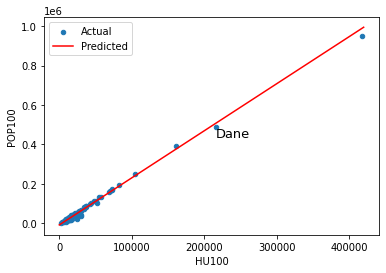

In [20]:
#q11
predict_df = pd.DataFrame({"HU100": range(1, 420000)})
predict_df["predicted_y"] = model.predict(predict_df)

ax = df.plot.scatter(x="HU100", y="POP100", label = 'Actual')
predict_df.plot.line(x="HU100", y="predicted_y", color="red", label = "Predicted", ax = ax)
ax.text(df.loc['Dane County']['HU100'], df.loc['Dane County']['POP100'], "Dane",
       verticalalignment='top', size = 13)

In [21]:
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])

In [22]:
#q12
B = (A >= 2) & (A <= 5)
sum(B.reshape(-1))

12

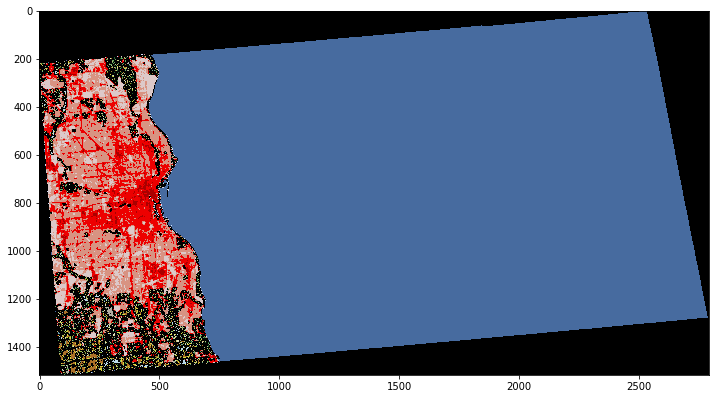

In [23]:
#q13
land = rasterio.open("zip://../p6/land.zip!wi.tif")

url = "https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/tigerWMS_Census2020/MapServer/82/query?where=NAME%3D%27Milwaukee+County%27&text=&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&distance=&units=esriSRUnit_Foot&relationParam=&outFields=&returnGeometry=true&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=geojson"
mil = gpd.read_file(url)
#mil.plot()

matrix, _ = mask(land, mil.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]
#print(matrix.shape)

c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(matrix, vmin=0, vmax=255,cmap = custom_cmap)

In [24]:
land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}

In [25]:
#q14
water = (matrix == land_use['open_water']).astype(int).sum()

zero = (matrix != 0).astype(int).sum()

water / zero

0.7963037455950543

Text(0.5, 0, 'Developed High Intensity in County')

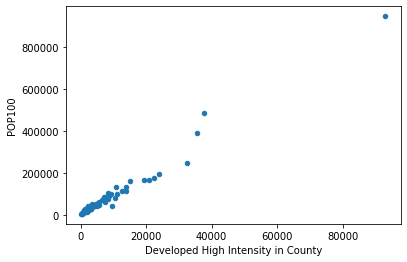

In [26]:
#q15
df = df.reset_index()
def get_percent_land(land_type):
    mat_list = []
    for idx, row in df.iterrows():
        matrix, _ = mask(land, df[idx:idx+1].to_crs(land.crs)["geometry"], crop=True)
        matrix = matrix[0]

        land_ty = (matrix == land_type).astype(int).sum()

        mat_list.append(land_ty)
    return mat_list
    
dev_high = get_percent_land(land_use["developed_high"])
df['dev_high'] = dev_high

ax = df.plot.scatter(x='dev_high', y='POP100')
ax.set_xlabel("Developed High Intensity in County")

In [27]:
df = gpd.read_file('tracts.geojson')

In [28]:
dev_high = get_percent_land(land_use["developed_high"])
df['dev_high'] = dev_high

In [29]:
medium = get_percent_land(land_use["developed_med"])
df['medium'] = medium

In [30]:
low = get_percent_land(land_use["developed_low"])
df['low'] = low

In [31]:
train, test = train_test_split(df, random_state=320)

In [32]:
m1 = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lr", LinearRegression()),
])

xcols = ['low', 'medium', 'dev_high']
m1.fit(train[xcols], train["POP100"])
score1 = cross_val_score(m1, train[xcols], train["POP100"])

In [33]:
m2 = LinearRegression()
m2.fit(train[["dev_high"]], train["POP100"])
score2 = cross_val_score(m2, train[["dev_high"]], train["POP100"])

Text(0, 0.5, 'R^2 Score')

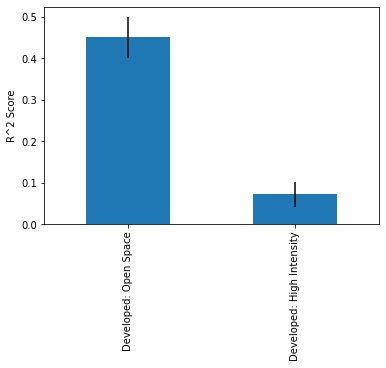

In [34]:
#q16
avg = pd.Series({"Developed: Open Space": score1.mean(), "Developed: High Intensity": score2.mean()})
std = pd.Series({"Developed: Open Space": score1.std(), "Developed: High Intensity": score2.std()})
ax = avg.plot.bar(yerr=std)
ax.set_ylabel("R^2 Score")

In [35]:
#q17
m1.score(test[xcols], test["POP100"])

0.44002867270117885

In [36]:
# I would Recommend using model 1 because the average cross validation score is
# much higher than that of model 1s. m1 = .450, m2 = .072
# Model 1 will beable to predict the Population better 
# than model 2 because of this higher average score as well as the R^2 score.
# The R^2 score of model 1 is about .45 while the R^2 score of model 2 is less then .1
# This would mean that model 2 would be much more realiable when predicting the POP100 